In [14]:
import import_ipynb
from loadData import raw_df, ad_info_columns, user_info_columns, context_info_columns, shop_info_columns, result_columns,ad_info_df, user_info_df, context_info_df, shop_info_df, result_df
from Util import getAllTypesofCategory, getAllTypesOfProperty
from Preprocessing import raw_df as new_raw_df

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import collections
import pandas as pd
%matplotlib inline

## split to five part of data 

In [3]:
# raw_df.hist(bins=15, figsize=(20,20), xlabelsize=12, ylabelsize=12)

In [4]:
def draw_df_feature_frequency(df, drop=None, title='Feature Frequency'):
    if drop != None:
        df = df.drop(drop, axis=1)
    fig = plt.figure(figsize=(28,4))
    fig.suptitle(title, fontsize=18)
    fig.subplots_adjust(wspace=0.6)
    feature_nums = len(list(df.columns))
    row = feature_nums/3
    for i, item in enumerate(list(df.columns)):
        ax = fig.add_subplot(1,feature_nums, i+1)
        ax.set_xlabel(item)
        ax.set_ylabel('frequency')
        sns.kdeplot(raw_df[item], shade=True, color='steelblue')

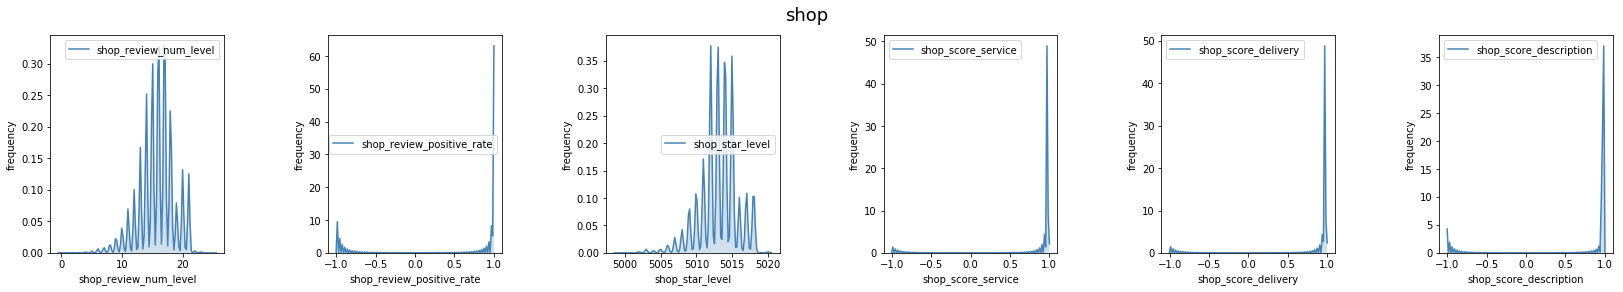

In [5]:
draw_df_feature_frequency(shop_info_df, title='shop')

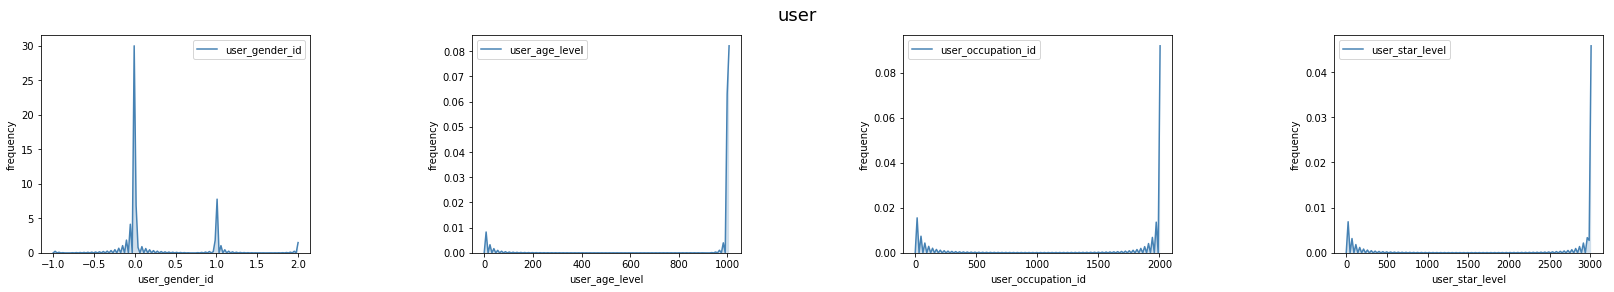

In [6]:
draw_df_feature_frequency(user_info_df, title='user')

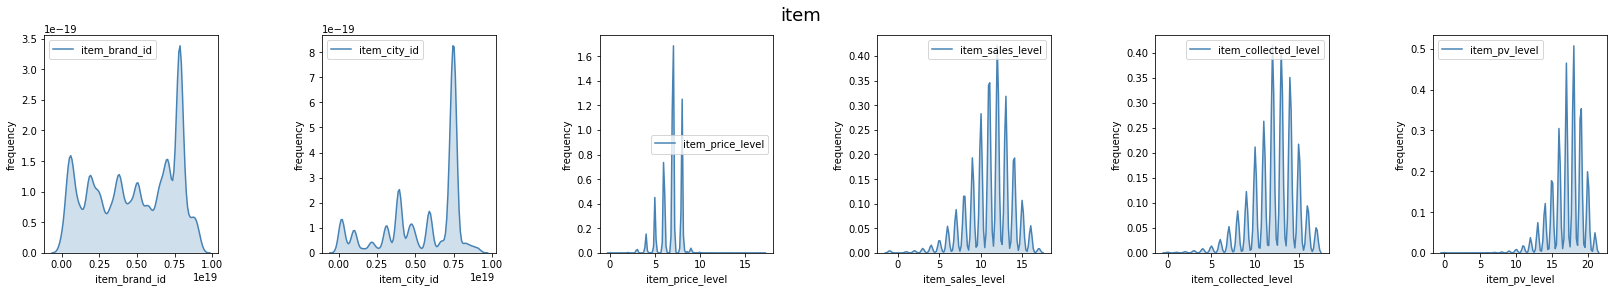

In [7]:
draw_df_feature_frequency(ad_info_df, drop=list(ad_info_df.select_dtypes(include=['object']).columns), title='item')

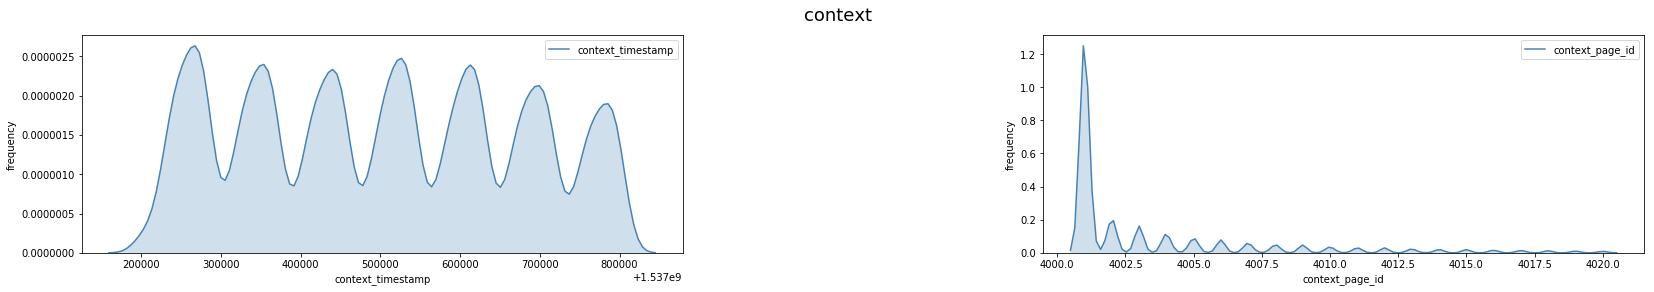

In [8]:
draw_df_feature_frequency(context_info_df, drop=list(context_info_df.select_dtypes(include=['object']).columns), title='context')

In [36]:
# property_list = getAllTypesOfProperty(raw_df, 'item_property_list')
arrays = list(new_raw_df['item_property_list_array'])
count = collections.Counter(list(itertools.chain(*arrays)))

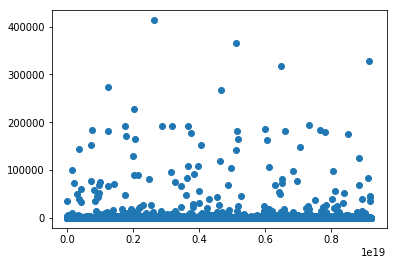

In [53]:
fig = plt.Figure(figsize=(20,10))
fig.suptitle('item propery id count figure', fontsize=15)
# plt.scatter(count.keys(), count.values())
ax = fig.add_subplot(1,1,1)
plt.scatter(count.keys(), count.values())

In [119]:
tmp_df = pd.DataFrame(data=list(zip(list(count.keys()), list(count.values()))), columns=['property_id', 'count'])

total = tmp_df.sort_values(by=['count'], axis=0, ascending=False)['count'].sum()

tmp_df.sort_values(by=['count'], axis=0, ascending=False)['count'].head(1499).sum()/total

0.819911751411079

In [129]:
pd.get_dummies?